In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


In [4]:
# Import dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Load the dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize base prediction (mean of target variable)
y_pred_init = np.mean(y_train)

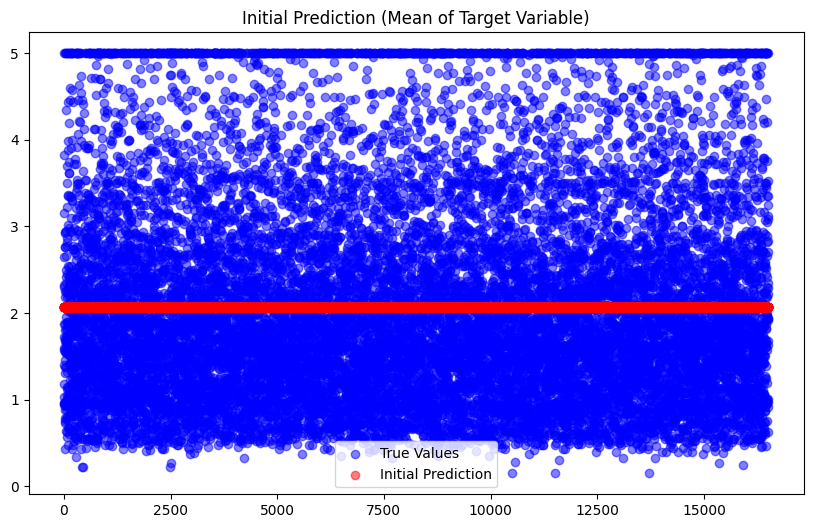

In [ ]:
#Initial Prediction:
#Plot 1: We compare the true target values and the initial predictions (which are simply the mean of the target variable) for the training data.


import matplotlib.pyplot as plt

# Plot Initial Prediction
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_train)), y_train, color='blue', label='True Values', alpha=0.5)
plt.scatter(range(len(y_train)), np.full_like(y_train, fill_value=y_pred_init), color='red', label='Initial Prediction', alpha=0.5)
plt.title("Initial Prediction (Mean of Target Variable)")
plt.legend()
plt.show()

In [46]:
# Gradient Boosting Algorithm with Plots
def gradient_boosting(X_train, y_train, n_estimators=200, learning_rate=0.1, max_depth=5):
    models = []
    y_pred = np.full_like(y_train, fill_value=y_pred_init)
    
    # Create a list to store residuals and predictions for plotting
    residuals_list = []
    predictions_list = []
    
    # Loop through each boosting round (iteration)
    for i in range(n_estimators):
        residuals = y_train - y_pred
        residuals_list.append(residuals)
        
        # Fit a decision tree regressor on the residuals
        tree = DecisionTreeRegressor(max_depth=max_depth)
        tree.fit(X_train, residuals)
        
        # Make predictions using the current model (tree)
        tree_pred = tree.predict(X_train)
        
        # Update the model predictions with the learning rate
        y_pred += learning_rate * tree_pred
        predictions_list.append(y_pred)
        
        models.append(tree)
    
    return models, residuals_list, predictions_list

In [47]:
#  Train the Gradient Boosting model
n_estimators = 200  # Number of trees (boosting rounds)
learning_rate = 0.1  # Learning rate to scale new model predictions

In [48]:
models, residuals_list, predictions_list = gradient_boosting(X_train, y_train, n_estimators, learning_rate)

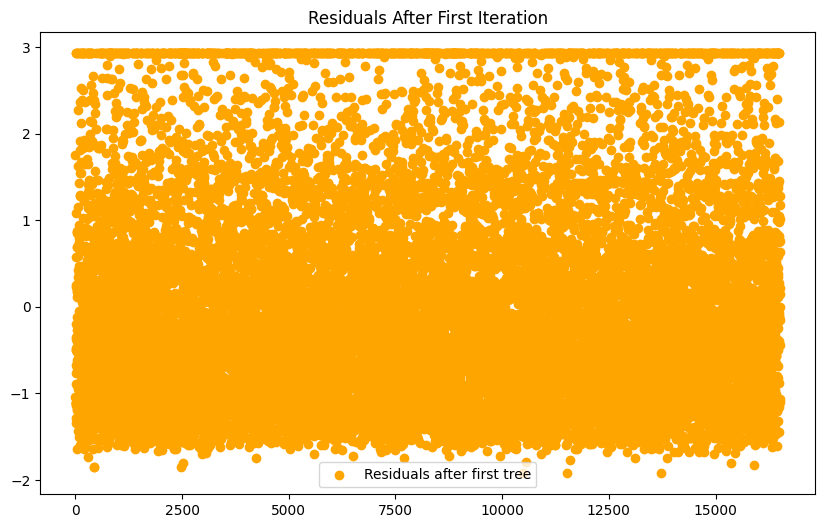

In [49]:
# Residuals:
# Plot 2: After the first iteration, we calculate the residuals (errors) by subtracting the current predictions from the actual target values. The plot shows the residuals after the first decision tree is trained.

# Plot Residuals After First Iteration
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_train)), residuals_list[0], color='orange', label='Residuals after first tree')
plt.title("Residuals After First Iteration")
plt.legend()
plt.show()

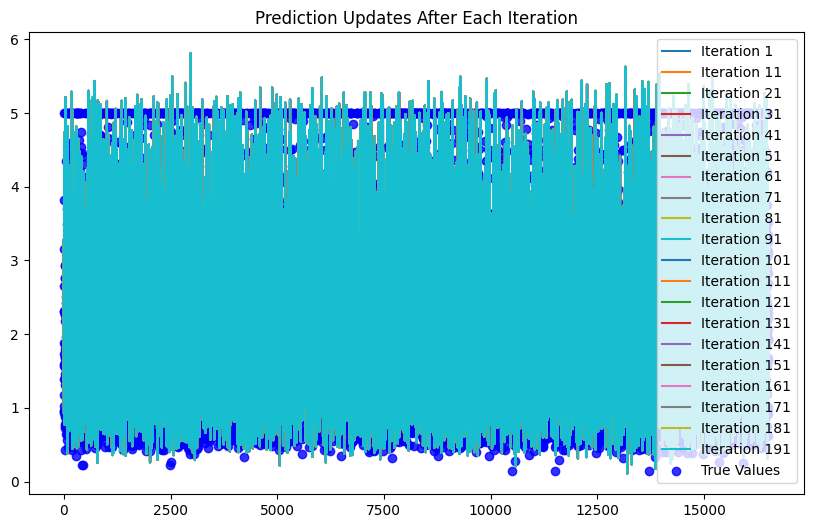

In [41]:
# Prediction Updates:
# Plot 3: As each new decision tree is trained on the residuals, the model's predictions are updated. This plot shows how predictions evolve after every 10 iterations, showing how each tree contributes to reducing the errors.



# Plot Prediction Update After Each Iteration
# We will plot the predictions after every 10 iterations
plt.figure(figsize=(10, 6))
for i in range(0, n_estimators, 10):
    plt.plot(range(len(y_train)), predictions_list[i], label=f'Iteration {i+1}')
    
plt.scatter(range(len(y_train)), y_train, color='blue', label='True Values', alpha=0.8)
plt.title("Prediction Updates After Each Iteration")
plt.legend()
plt.show()

In [42]:
# Predict on the test data
y_test_pred = np.full_like(y_test, fill_value=y_pred_init)


In [43]:
for tree in models:
    y_test_pred += learning_rate * tree.predict(X_test)

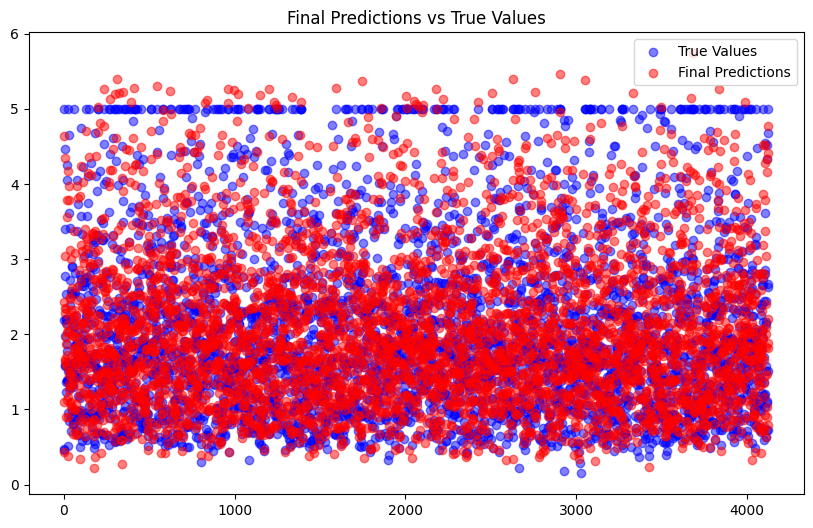

In [44]:
# Final Predictions vs True Values:
# Plot 4: After all iterations, we compare the final model's predictions with the true target values on the test data. This plot illustrates how well the model performs.



# Plot Final Predictions vs True Values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Values', alpha=0.5)
plt.scatter(range(len(y_test)), y_test_pred, color='red', label='Final Predictions', alpha=0.5)
plt.title("Final Predictions vs True Values")
plt.legend()
plt.show()

In [45]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on Test Data: {mse}")

Mean Squared Error on Test Data: 0.2615222917924169
